# Explaining the evolution of Italian electricity prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format

python(55130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## EDA

In [2]:
prices = pd.read_csv('../data/mgp_prices.csv') # Hour - several% null
demand = pd.read_csv('../data/day_ahead_load_forecast.csv') # Hour - 1% null
renewables = pd.read_csv('../data/wind_solar_generation.csv') # Hour
transfer_capacity = pd.read_csv('../data/day_ahead_ntc.csv') #Hour
gas_price = pd.read_csv('../data/ttf_gas_price.csv') #monthly


In [3]:
df = pd.read_csv()

# CALA, CNOR, CSUD, NORD, SARD, SICI, SUD

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

#### Day ahead price 

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48767 entries, 0 to 48766
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48767 non-null  object 
 1   PUN         48767 non-null  float64
 2   NAT         48767 non-null  float64
 3   CALA        31223 non-null  float64
 4   CNOR        48767 non-null  float64
 5   CSUD        48767 non-null  float64
 6   NORD        48767 non-null  float64
 7   SARD        48767 non-null  float64
 8   SICI        48767 non-null  float64
 9   SUD         48767 non-null  float64
 10  AUST        48767 non-null  float64
 11  COAC        48767 non-null  float64
 12  COUP        24888 non-null  float64
 13  CORS        48767 non-null  float64
 14  FRAN        48767 non-null  float64
 15  GREC        48767 non-null  float64
 16  SLOV        48767 non-null  float64
 17  SVIZ        48767 non-null  float64
 18  BSP         48767 non-null  float64
 19  MALT        48767 non-nul

In [ ]:
prices.iloc[:, 1:10].cov()

,PUN,NAT,CALA,CNOR,CSUD,NORD,SARD,SICI,SUD
PUN,"12,840.767","12,759.541","13,573.865","13,061.972","12,556.645","13,086.564","11,833.343","12,090.658","12,412.618"
NAT,"12,759.541","12,707.673","13,486.160","12,973.506","12,486.395","12,998.467","11,760.053","12,033.967","12,349.958"
CALA,"13,573.865","13,486.160","13,326.096","13,733.301","13,405.242","13,726.768","12,537.263","13,235.822","13,356.713"
CNOR,"13,061.972","12,973.506","13,733.301","13,330.077","12,726.115","13,340.478","11,948.432","12,210.901","12,565.534"
CSUD,"12,556.645","12,486.395","13,405.242","12,726.115","12,406.521","12,734.070","11,693.164","11,919.230","12,255.854"
NORD,"13,086.564","12,998.467","13,726.768","13,340.478","12,734.070","13,379.804","11,953.471","12,214.147","12,571.860"
SARD,"11,833.343","11,760.053","12,537.263","11,948.432","11,693.164","11,953.471","11,920.272","11,264.612","11,562.365"
SICI,"12,090.658","12,033.967","13,235.822","12,210.901","11,919.230","12,214.147","11,264.612","11,958.308","11,875.392"
SUD,"12,412.618","12,349.958","13,356.713","12,565.534","12,255.854","12,571.860","11,562.365","11,875.392","12,205.244"


In [ ]:
prices.iloc[:, 1:10].corr()

,PUN,NAT,CALA,CNOR,CSUD,NORD,SARD,SICI,SUD
PUN,1.000,0.999,0.985,0.998,0.995,0.998,0.956,0.976,0.992
NAT,0.999,1.000,0.986,0.997,0.994,0.997,0.956,0.976,0.992
CALA,0.985,0.986,1.000,0.976,0.991,0.975,0.939,0.988,0.996
CNOR,0.998,0.997,0.976,1.000,0.990,0.999,0.948,0.967,0.985
CSUD,0.995,0.994,0.991,0.990,1.000,0.988,0.962,0.979,0.996
NORD,0.998,0.997,0.975,0.999,0.988,1.000,0.947,0.966,0.984
SARD,0.956,0.956,0.939,0.948,0.962,0.947,1.000,0.943,0.959
SICI,0.976,0.976,0.988,0.967,0.979,0.966,0.943,1.000,0.983
SUD,0.992,0.992,0.996,0.985,0.996,0.984,0.959,0.983,1.000


In [ ]:
prices.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
prices = prices.astype({'Date': 'datetime64[ns]'})

In [ ]:
prices.columns

Index(['Unnamed: 0', 'PUN', 'NAT', 'CALA', 'CNOR', 'CSUD', 'NORD', 'SARD',
       'SICI', 'SUD', 'AUST', 'COAC', 'COUP', 'CORS', 'FRAN', 'GREC', 'SLOV',
       'SVIZ', 'BSP', 'MALT', 'XAUS', 'XFRA', 'MONT', 'XGRE', 'ROSN'],
      dtype='object')

In [ ]:
prices.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
CORS,"48,767.000",219.192,363.783,0.000,53.175,97.570,190.000,"3,500.000"
MONT,"40,511.000",143.617,133.417,0.000,57.443,106.320,186.470,"1,250.000"
COUP,"24,888.000",195.410,125.815,0.100,106.728,152.125,240.645,871.000
XGRE,"31,607.000",166.513,116.157,0.000,92.990,126.360,210.800,870.000
SLOV,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000
NORD,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000
XFRA,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000
XAUS,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000
AUST,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000
BSP,"48,767.000",126.357,115.671,0.000,49.460,90.000,157.850,871.000


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


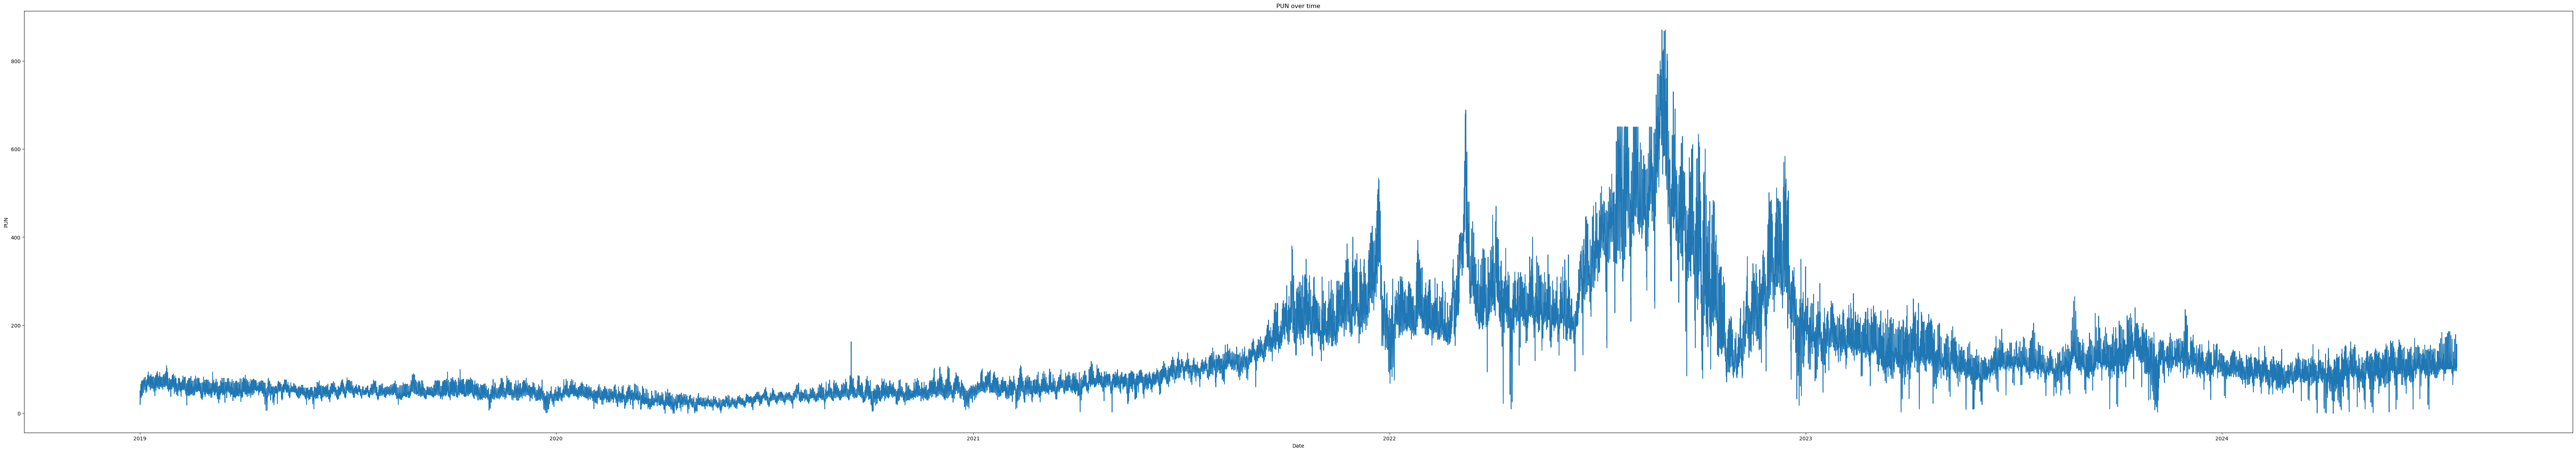

In [ ]:
plt.figure(figsize=(90, 15))
sns.lineplot(prices[['Date','PUN']], x='Date', y='PUN')
plt.title('PUN over time')

plt.show()

### demand

In [ ]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   Date     15551 non-null  datetime64[ns, UTC]
 1   IT_NORD  15550 non-null  float64            
 2   IT_CNOR  15550 non-null  float64            
 3   IT_SARD  15550 non-null  float64            
 4   IT_CSUD  15550 non-null  float64            
 5   IT_SUD   15550 non-null  float64            
 6   IT_CALA  15550 non-null  float64            
 7   IT_SICI  15550 non-null  float64            
 8   IT       15550 non-null  float64            
 9   Hour     15551 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(8), int32(1)
memory usage: 1.1 MB


In [ ]:
demand.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
demand['Date'] = demand['Date'].astype('datetime64[ns, UTC]')
demand['Hour'] = demand['Date'].dt.hour

In [ ]:
demand.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
Date,15551,2023-11-20 22:00:00+00:00,2022-12-31 23:00:00+00:00,2023-06-11 22:30:00+00:00,2023-11-20 22:00:00+00:00,2024-04-30 21:30:00+00:00,2024-10-09 21:00:00+00:00,NaN
IT_NORD,"15,550.000","17,798.499","7,809.000","14,250.000","17,266.000","21,497.000","29,089.000","4,293.688"
IT_CNOR,"15,550.000","2,732.301","1,318.000","2,152.000","2,637.000","3,297.000","5,048.000",672.620
IT_SARD,"15,550.000",945.653,552.000,825.000,945.000,"1,052.000","1,622.000",161.931
IT_CSUD,"15,550.000","5,647.460","3,140.000","4,649.250","5,681.500","6,482.000","9,625.000","1,174.508"
IT_SUD,"15,550.000","2,144.023",693.000,"1,776.000","2,130.000","2,465.000","4,331.000",520.163
IT_CALA,"15,550.000",680.847,242.000,547.000,672.000,782.000,"2,437.000",187.497
IT_SICI,"15,550.000","2,008.360","1,187.000","1,695.000","2,007.000","2,260.000","3,947.000",423.222
IT,"15,550.000","31,957.032","16,300.000","25,919.250","31,655.000","37,603.000","52,669.000","6,982.919"


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


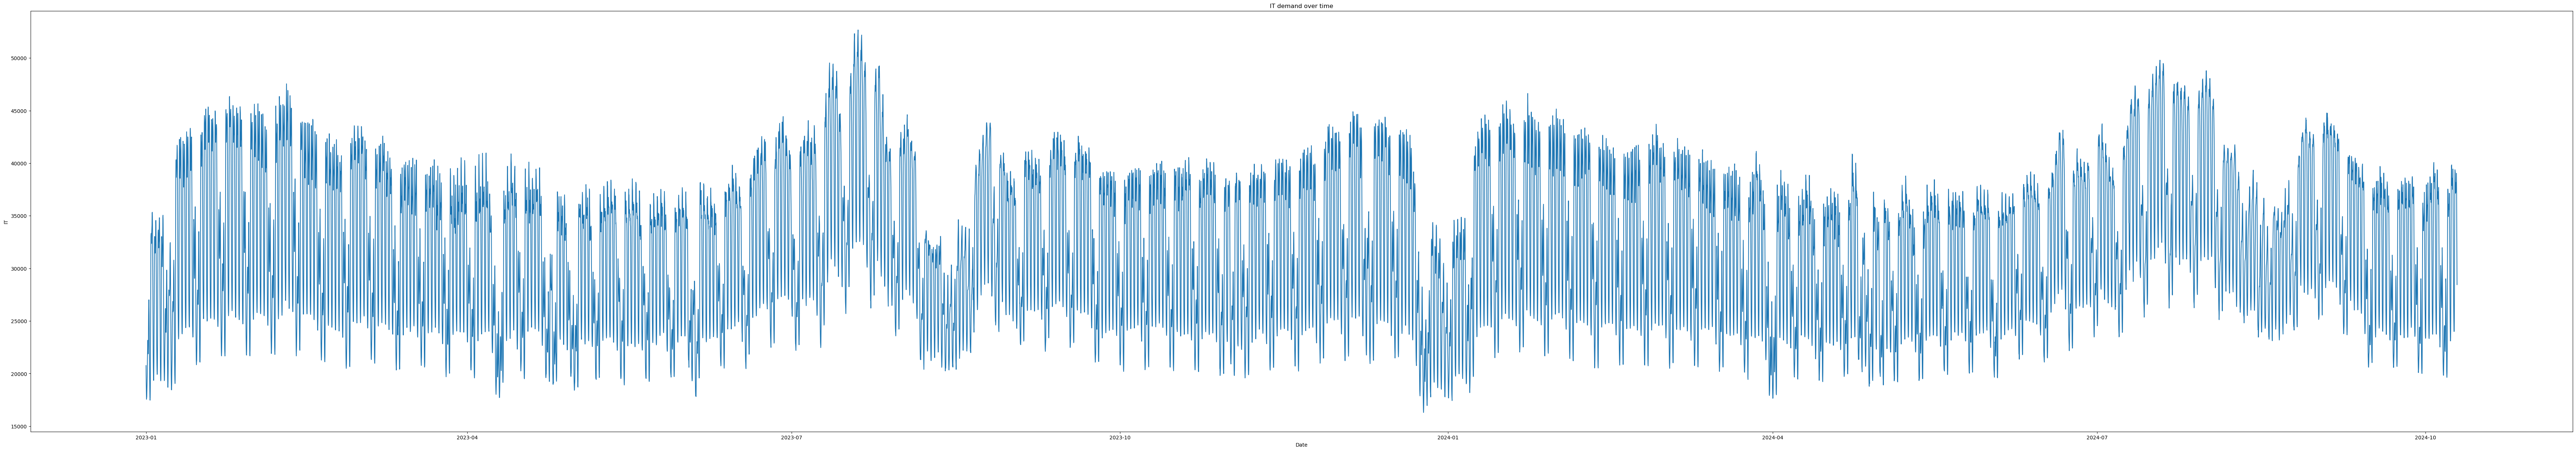

In [ ]:
plt.figure(figsize=(90, 15))
sns.lineplot(demand, x='Date', y='IT')
plt.title('IT demand over time')
plt.show()

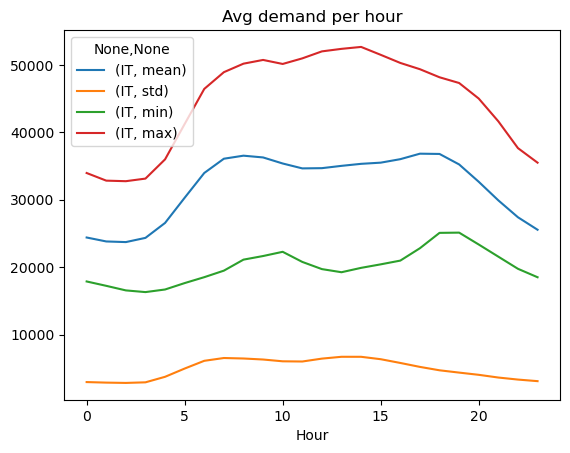

Hour             0          1          2          3          4          5   \
IT count    648.000    648.000    648.000    648.000    648.000    648.000   
   mean  24,398.429 23,812.065 23,717.806 24,342.380 26,559.466 30,294.309   
   std    2,952.153  2,871.851  2,826.274  2,914.245  3,734.206  4,958.303   
   min   17,877.000 17,229.000 16,551.000 16,300.000 16,685.000 17,637.000   
   25%   22,580.250 22,015.000 21,803.750 22,374.000 24,097.500 26,906.250   
   50%   24,367.000 23,896.500 23,824.000 24,586.000 26,853.500 31,786.000   
   75%   26,123.000 25,400.750 25,153.250 25,801.500 29,176.750 33,733.000   
   max   33,965.000 32,833.000 32,751.000 33,137.000 35,990.000 41,236.000   

Hour             6          7          8          9          10         11  \
IT count    648.000    648.000    648.000    648.000    648.000    648.000   
   mean  33,969.995 36,085.244 36,535.522 36,274.952 35,376.637 34,650.008   
   std    6,106.421  6,521.728  6,449.670  6,298.532  6,033.301  6,002.978   
   min   18,513.000 19,481.000 21,115.000 21,650.000 22,276.000 20,777.000   
   25%   29,154.500 30,912.500 31,706.500 31,404.250 30,860.250 30,256.000   
   50%   36,339.500 38,102.000 37,938.000 37,545.500 35,979.000 35,544.000   
   75%   38,468.500 40,875.000 41,273.750 40,945.500 40,038.000 38,720.000   
   max   46,441.000 48,923.000 50,185.000 50,739.000 50,142.000 50,970.000   

Hour             12         13         14         15         16         17  \
IT count    648.000    648.000    648.000    648.000    648.000    648.000   
   mean  34,684.457 35,026.205 35,326.270 35,500.636 36,018.535 36,832.210   
   std    6,431.365  6,703.007  6,701.217  6,344.143  5,787.952  5,203.280   
   min   19,710.000 19,246.000 19,896.000 20,416.000 20,972.000 22,808.000   
   25%   29,545.000 29,322.000 29,797.000 30,767.500 32,242.500 33,497.750   
   50%   35,962.000 36,376.500 36,354.500 36,167.500 36,103.000 37,107.500   
   75%   38,879.750 39,718.750 40,106.000 40,420.750 40,344.000 40,654.750   
   max   52,008.000 52,382.000 52,669.000 51,496.000 50,293.000 49,363.000   

Hour             18         19         20         21         22         23  
IT count    648.000    648.000    648.000    648.000    647.000    647.000  
   mean  36,792.323 35,237.116 32,663.304 29,905.843 27,400.068 25,548.077  
   std    4,698.806  4,357.128  4,028.323  3,624.688  3,323.141  3,089.119  
   min   25,086.000 25,121.000 23,358.000 21,555.000 19,755.000 18,503.000  
   25%   33,893.250 32,621.500 30,234.000 27,672.250 25,292.000 23,694.000  
   50%   36,894.000 34,785.000 32,001.000 29,389.000 26,996.000 25,330.000  
   75%   40,406.500 38,548.250 35,906.000 32,589.250 29,716.500 27,510.500  
   max   48,166.000 47,316.000 45,008.000 41,630.000 37,657.000 35,498.000

: 

In [ ]:
demand[['Hour', 'IT']].groupby(by=['Hour']).agg(['mean', 'std', 'min', 'max']).plot(title='Avg demand per hour')
plt.show()

demand[['Hour', 'IT']].groupby(by=['Hour']).describe().T

### NTC

In [ ]:
transfer_capacity.columns.tolist()

['Unnamed: 0',
 'CH > IT_NORD',
 'IT_NORD > CH',
 'FR > IT_NORD',
 'IT_NORD > FR',
 'SI > IT_NORD',
 'IT_NORD > SI',
 'AT > IT_NORD',
 'IT_NORD > AT',
 'IT_CNOR > IT_NORD',
 'IT_NORD > IT_CNOR',
 'AT > IT',
 'IT > AT',
 'FR > IT',
 'IT > FR',
 'GR > IT',
 'IT > GR',
 'ME > IT',
 'IT > ME',
 'SI > IT',
 'IT > SI',
 'CH > IT',
 'IT > CH',
 'GR > IT_SUD',
 'IT_SUD > GR',
 'IT_CSUD > IT_SUD',
 'IT_SUD > IT_CSUD',
 'IT_CALA > IT_SUD',
 'IT_SUD > IT_CALA',
 'IT_CNOR > IT_CSUD',
 'IT_CSUD > IT_CNOR',
 'IT_SARD > IT_CSUD',
 'IT_CSUD > IT_SARD',
 'IT_CALA > IT_SICI',
 'IT_SICI > IT_CALA']

### Renewables

In [ ]:
renewables.columns.tolist()

['Unnamed: 0',
 'ECe Solar ITA',
 'ECe Wind ITA',
 'ECo Solar ITA',
 'ECo Wind ITA',
 'GFSe Solar ITA',
 'GFSe Wind ITA',
 'GFSo Solar ITA',
 'GFSo Wind ITA',
 'Solar CALA',
 'Solar CNOR',
 'Solar CSUD',
 'Solar NORD',
 'Solar SARD',
 'Solar SICI',
 'Solar SUD',
 'Wind CALA',
 'Wind CNOR',
 'Wind CSUD',
 'Wind ITA',
 'Wind NORD',
 'Wind SARD',
 'Wind SICI',
 'Wind SUD']

### Gas Price

In [ ]:
gas_price.head(3)

,Date,Price
0,2024-10,38.515
1,2024-09,39.044
2,2024-08,39.825


In [ ]:
gas_price.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,70,70,2024-10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,70.000,NaN,NaN,NaN,46.797,48.401,4.385,15.279,31.293,49.756,239.905


In [ ]:
gas_price.columns

Index(['Date', 'Price'], dtype='object')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


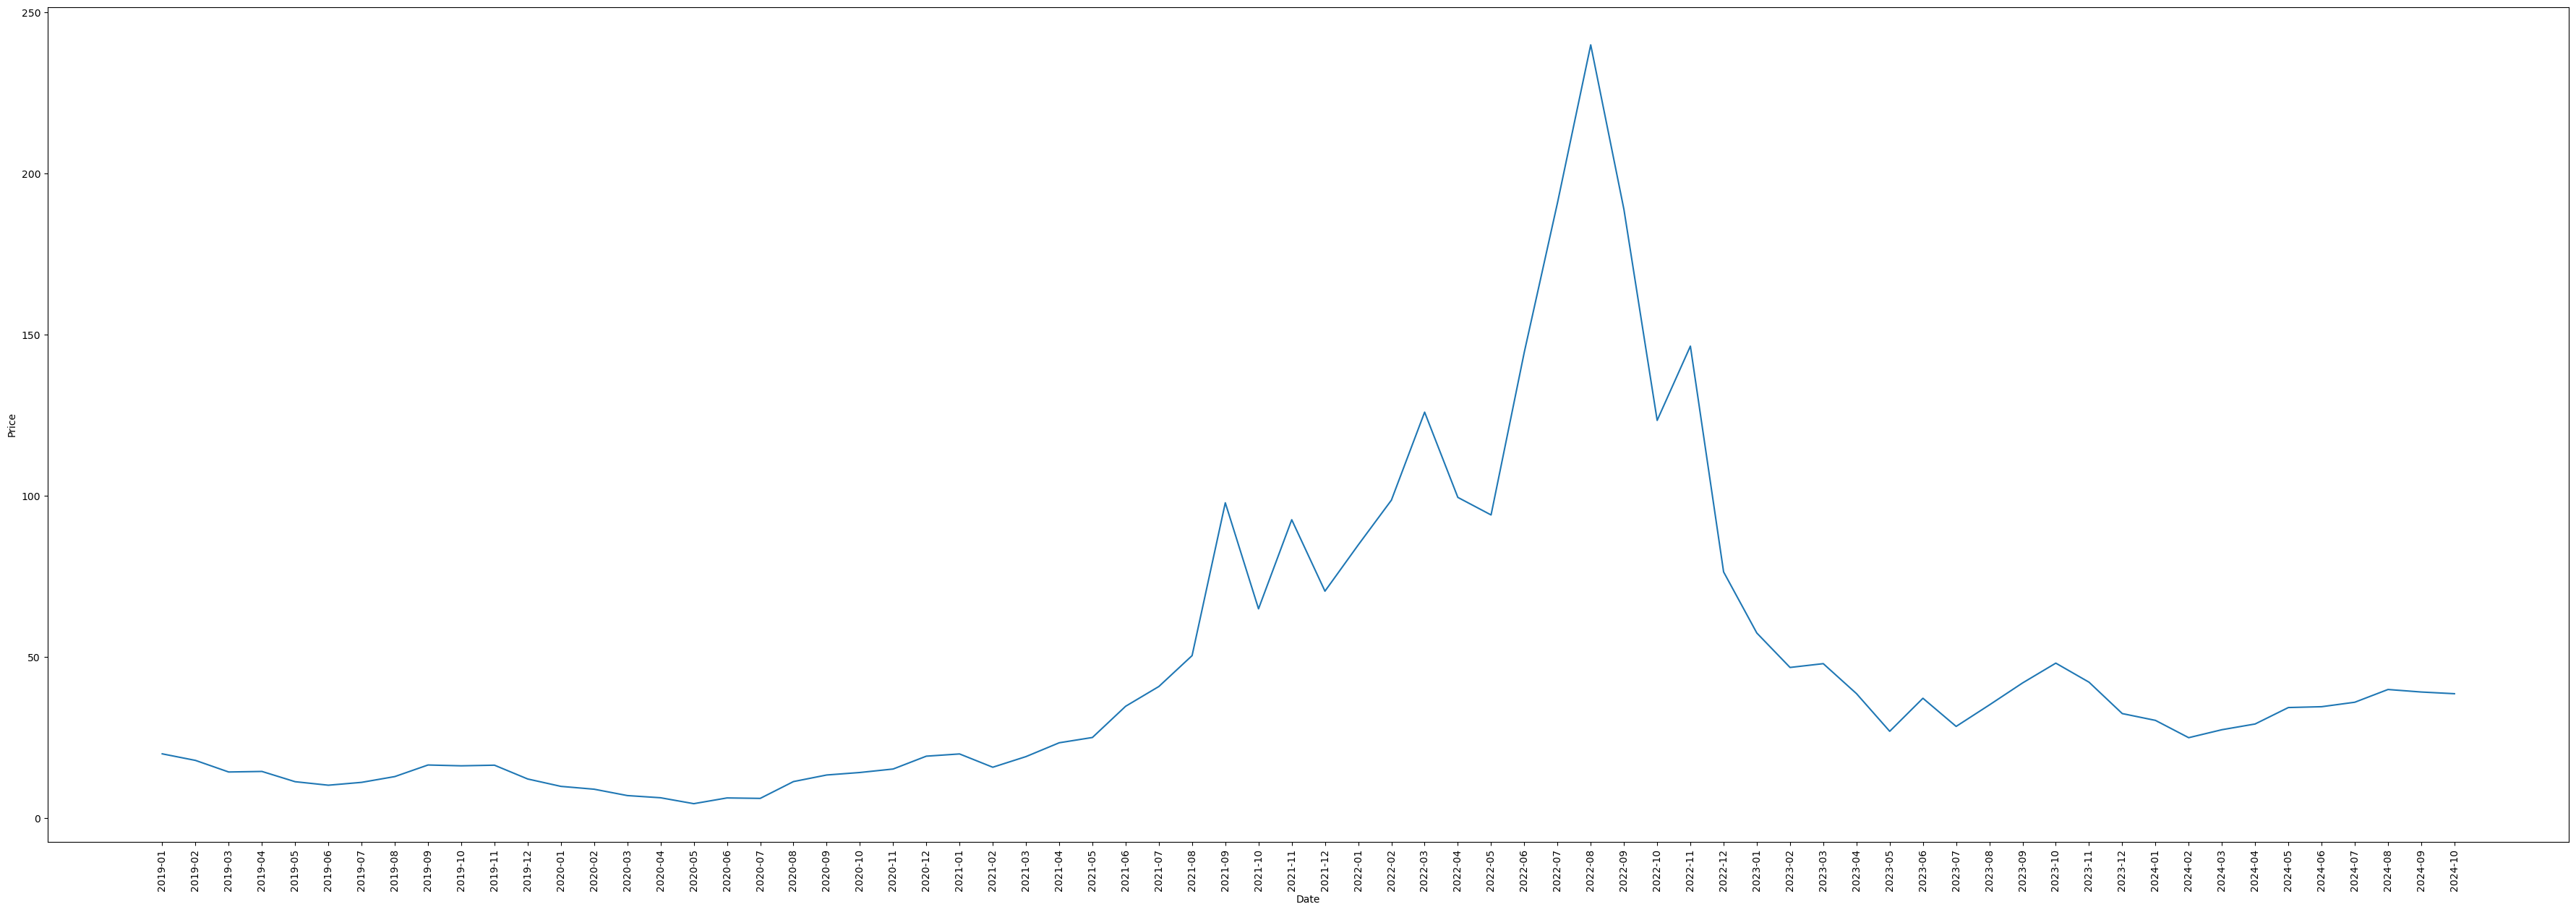

In [ ]:
plt.figure(figsize=(45, 15))
sns.lineplot(gas_price.sort_values(by='Date'), x='Date', y='Price')
plt.xticks(rotation=90)
plt.show()

---

## Questions

- how should we aggregate the data of price? it’s given in hourly basis, but in the presentation and slide it was supposed to be daily

-  what was the NAT Price?

- what to do with Null in prices? 

- dates timezone? italy?

- 


renew:
- clarify the differences between the ECe, ECo, GFSe, and GFSo datasets

gas price:
- is gas price constant over the month?


==> price and gas is from 2019, but others are from 2023. 

==> how to predict? the target to predict for all zones or one? which model to use?

==> do we have to check normality? 

==> we checked correlation, should we go with only one target?

- how to use the ntc in our dataset? how to use them. do they affect only the zone involved or all zones.


Sarima or regression?  / LSTM

## findings 

- corrrolation with gas price

In [ ]:
# Convert datetime columns to UTC and then remove timezone information
mgp_prices['datetime'] = pd.to_datetime(mgp_prices['datetime'], utc=True).dt.tz_convert(None)
ntc['datetime'] = pd.to_datetime(ntc['datetime'], utc=True).dt.tz_convert(None)
gas_price['datetime'] = pd.to_datetime(gas_price['datetime'], utc=True).dt.tz_convert(None)
wind_solar['datetime'] = pd.to_datetime(wind_solar['datetime'], utc=True).dt.tz_convert(None)
load_forecast['datetime'] = pd.to_datetime(load_forecast['datetime'], utc=True).dt.tz_convert(None)

# Step 3: Merge All Data on the 'datetime' Column
# Start by merging mgp_prices with ntc data
merged_data = pd.merge(mgp_prices, ntc, on='datetime', how='left')

# Merge with gas price data
merged_data = pd.merge(merged_data, gas_price, on='datetime', how='left')

# Merge with wind_solar data
merged_data = pd.merge(merged_data, wind_solar, on='datetime', how='left')

# Merge with load forecast data
merged_data = pd.merge(merged_data, load_forecast, on='datetime', how='left')

# The final merged data will contain all variables aligned to hourly timestamps